# Análise de dados - Inferência Estatística

O objetivo desta atividade é re-utilizar os dados de uma avaliação educacional federal e fazer algumas inferências sobre como as variáveis de estudo se comportam


O objetivo desta atividade é levantar alguma hipóteses sobre os dados e sugestões de intervenções. 
No campo de políticas públicas, é sempre importante que as decisões sejam baseadas em dados (e não em achismos). Assim é importante saber:
-  O 6º ano e o 8º ano não reprovam, logo rend_6 e rend_8 devem estar o mais próximo possível de 1,0 (100%);
-  O As médias das notas de Língua Portuguesa e Matemática quanto maior melhor; 
- Existe uma fórmula matemática que relaciona o Indicador de Rendimento, a Nota Padronizada e o IDEB;
- Os governos federal e distrital utilizam-se do IDEB para distribuir dinheiro para as escolas;
- No ano de 2021, que são as referências para estes dados, não houve reprovação por conta da pandemia de Covid 19.

Assim, utilizando novamente os dados de SAEB, vocês devem:
- (1) Análise a presença de outliers no redimento (aprovação) de cada um dos anos e das notas de Língua Portuguesa, Matemática e IDEB (faça o boxplot de cada uma dessas variáveis). Os dados estão bem distribuídos (utilize as técnicas que acharem mais viáveis para fazer esta análise);
- (2) Calcule a covariância das seguintes variáveis (variância conjunta): aprovação média e indicador de rendimento, indicador de rendimento e nota padronizada, nota padronizada e IDEB, indicador de rendimento e IDEB.
- (3) Faça gráficos de dispersão das informações acima. É possível identificar algum padrão?
- (4) Calcule a correlação dos itens pedidos em (2)
- (5) O que é possível inferir de todas as análises realizadas nos itens de (1) a (4).

In [29]:
import seaborn as sns
from matplotlib import pyplot
import numpy as np
import pandas as pd
dados = pd.read_csv('DadosIDEB.csv')
dados.head()

,UF,municipio,Cod. da Escola,Rede,Ap_Media,Rend_6,Rend_7,Rend_8,Rend_9,Indicador de rendimento,Nota_SAEB_Mat,Nota_SAEB_ LP,Nota_Padronizada,IDEB
0,DF,brasilia,53009380,Estadual,87.9,100.0,87.2,88.9,73.5,0.863522,226.82,239.87,4.444833,3.8
1,DF,brasilia,53011589,Estadual,83.4,95.6,72.3,81.3,84.1,0.825044,239.28,240.48,4.662667,3.8
2,DF,brasilia,53010019,Estadual,86.5,NaN,NaN,100.0,83.3,0.908893,231.85,223.94,4.263167,3.9
3,DF,brasilia,53009665,Estadual,86.8,100.0,84.3,87.2,75.0,0.857199,240.40,244.53,4.748833,4.1
4,DF,brasilia,53006720,Estadual,94.6,100.0,82.1,100.0,94.9,0.936381,235.71,238.84,4.575833,4.3


<AxesSubplot:>

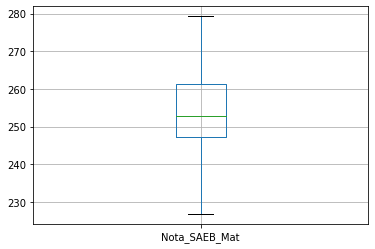

In [2]:
dados.boxplot('Nota_SAEB_Mat')

<AxesSubplot:xlabel='Nota_SAEB_Mat', ylabel='Density'>

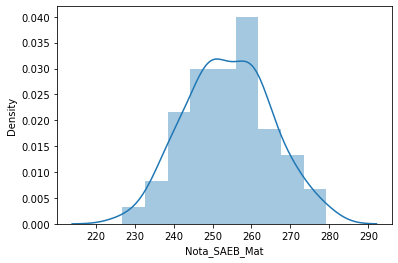

In [10]:
x = dados['Nota_SAEB_Mat']
sns.distplot(x)

In [12]:
def zscore(x):
  media = np.mean(x)
  desvio = np.std(x)
  z = []
  for i in x:
    z.append((i-media)/desvio)
  return z
z = zscore(x)
z

[-2.528046420167033,
 -1.371666273139398,
 -2.0612252211663105,
 -1.267721990260509,
 -1.7029886748158543,
 -0.481643350988915,
 -1.775378443249366,
 -1.114589787805003,
 -0.7767708684486169,
 -0.9410399583554326,
 -1.611109353342553,
 -1.3614574596423656,
 0.10118709229628127,
 -0.4788591291260875,
 -1.3688820512765705,
 -1.4468402634357371,
 0.6106996931936882,
 -0.667258141844073,
 -1.2370955497694094,
 -1.3057730223858162,
 -0.5930122255020114,
 -0.671898511615453,
 -0.3257269266705816,
 -0.7739866465857894,
 -1.218534070683892,
 -0.26168982382555234,
 -1.7363993371697841,
 -0.5428962319711168,
 0.4854097093664597,
 -0.11598221300425392,
 0.057567616445319235,
 -0.44452039281788286,
 -1.0960283087194884,
 -1.272362360031889,
 -0.21714227402031536,
 -0.7888358298542018,
 -0.5493927496510493,
 0.3044352882826764,
 -0.3331515183047891,
 -0.21342997820321294,
 0.06127991226242166,
 -0.9763067686179122,
 -0.18094738980355818,
 -0.946608402081085,
 -0.8389518233850937,
 -0.29602856013375

<AxesSubplot:>

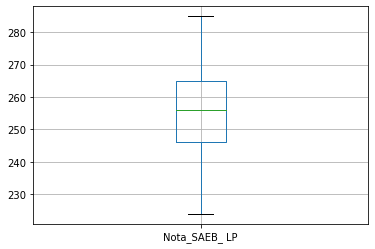

In [4]:
dados.boxplot('Nota_SAEB_ LP')

<AxesSubplot:xlabel='Nota_SAEB_ LP', ylabel='Density'>

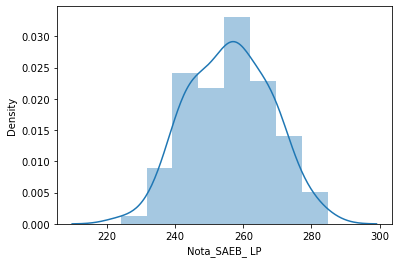

In [14]:
y = dados['Nota_SAEB_ LP']
sns.distplot(y)

In [15]:
def zscore(y):
  media = np.mean(y)
  desvio = np.std(y)
  z = []
  for i in y:
    z.append((i-media)/desvio)
  return z
z = zscore(y)
z

[-1.3454956053051275,
 -1.2943302244395634,
 -2.6816669449583332,
 -0.9546256465616288,
 -1.4318896090617377,
 -1.0577951850282596,
 -1.450342697242761,
 -0.8741030799535254,
 -0.818743815410455,
 -1.3656262469571538,
 -1.9754169336664305,
 -1.1743851512629098,
 0.5258152915977609,
 -1.9687067197824233,
 -1.6910716203315688,
 -1.4889264270758111,
 -0.8162274852039518,
 -0.8782969636310317,
 -0.9621746371811388,
 -0.939527665322609,
 -0.7130579467373209,
 -1.077925826680286,
 0.16849640227430565,
 -0.6207925058322037,
 -1.5182836128183481,
 -0.5889189898831634,
 -1.231421969276983,
 -1.147544295726876,
 0.6642134529554355,
 -0.005969158709918044,
 -0.7340273651248478,
 -0.479039237532523,
 -1.1618035002303932,
 0.3354129726390194,
 -0.31380022063881224,
 -0.9277847910255952,
 -0.026938577097444804,
 0.7489299032410429,
 -0.3792248060078958,
 -0.6224700593032043,
 -0.04706921874947126,
 -0.8824908473085381,
 -0.0017752750324141226,
 -0.36077171782686995,
 0.023388027032618944,
 0.0980391

<AxesSubplot:>

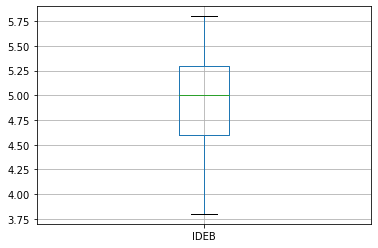

In [5]:
dados.boxplot('IDEB')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='IDEB', ylabel='Density'>

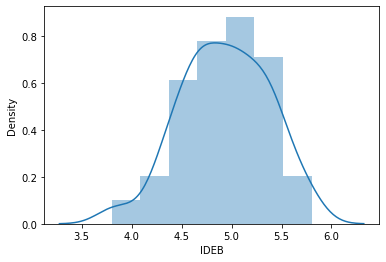

In [20]:
w = dados['IDEB']
sns.distplot(w)

In [21]:
def zscore(w):
  media = np.mean(w)
  desvio = np.std(w)
  z = []
  for i in w:
    z.append((i-media)/desvio)
  return z
z = zscore(w)
z

[-2.5796948069281935,
 -2.5796948069281935,
 -2.3516187853714516,
 -1.8954667422579683,
 -1.439314699144484,
 -1.439314699144484,
 -1.439314699144484,
 -1.439314699144484,
 -1.439314699144484,
 -1.211238677587741,
 -1.211238677587741,
 -1.211238677587741,
 -1.211238677587741,
 -1.211238677587741,
 -1.211238677587741,
 -0.983162656031,
 -0.983162656031,
 -0.983162656031,
 -0.983162656031,
 -0.7550866344742588,
 -0.7550866344742588,
 -0.7550866344742588,
 -0.7550866344742588,
 -0.7550866344742588,
 -0.7550866344742588,
 -0.7550866344742588,
 -0.7550866344742588,
 -0.5270106129175156,
 -0.5270106129175156,
 -0.5270106129175156,
 -0.5270106129175156,
 -0.5270106129175156,
 -0.5270106129175156,
 -0.5270106129175156,
 -0.5270106129175156,
 -0.5270106129175156,
 -0.5270106129175156,
 -0.5270106129175156,
 -0.5270106129175156,
 -0.29893459136077455,
 -0.29893459136077455,
 -0.29893459136077455,
 -0.29893459136077455,
 -0.29893459136077455,
 -0.29893459136077455,
 -0.07085856980403143,
 -0.0708

In [22]:
#COVARIANCIAS

a = dados['Ap_Media']
b = dados['Indicador de rendimento']
np.cov(a,b)

array([[1.32037636e+01, 1.35585488e-01],
       [1.35585488e-01, 1.45357734e-03]])

In [23]:
c = dados['Nota_Padronizada']
np.cov(b,c)

array([[0.00145358, 0.00361084],
       [0.00361084, 0.13440077]])

In [24]:
np.cov(c,w)

array([[0.13440077, 0.14466523],
       [0.14466523, 0.19412336]])

In [25]:
np.cov(b,w)

array([[0.00145358, 0.01100908],
       [0.01100908, 0.19412336]])

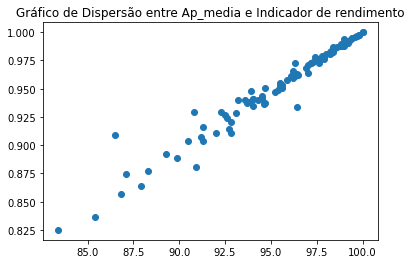

In [30]:
#GRÁFICO DE DISPERSÃO

pyplot.scatter(a, b)
pyplot.title('Gráfico de Dispersão entre Ap_media e Indicador de rendimento')
pyplot.show()

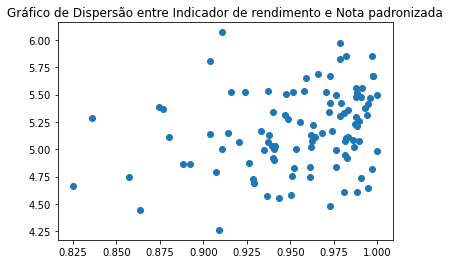

In [32]:
pyplot.scatter(b, c)
pyplot.title('Gráfico de Dispersão entre Indicador de rendimento e Nota padronizada')
pyplot.show()

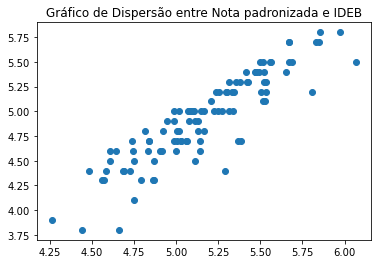

In [33]:
pyplot.scatter(c, w)
pyplot.title('Gráfico de Dispersão entre Nota padronizada e IDEB')
pyplot.show()

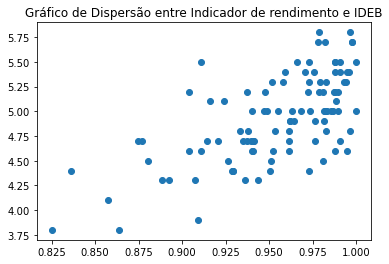

In [34]:
pyplot.scatter(b, w)
pyplot.title('Gráfico de Dispersão entre Indicador de rendimento e IDEB')
pyplot.show()

<AxesSubplot:>

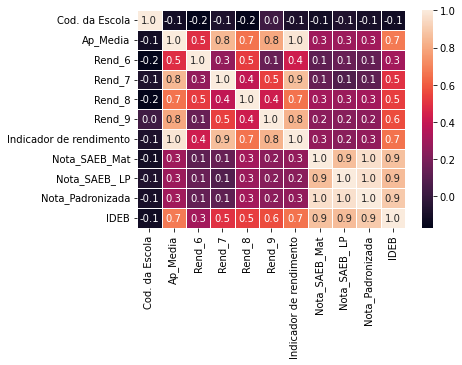

In [37]:
#CORRELAÇÃO

correlation = dados.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [ ]:
#EXPLICAÇÃO

Podemos inferir que certos dados apresentam uma relação direta, onde um influencia diretamente no outro. Também pode-se perceber que os dados estão bem distribuídos, pois no boxplot não foi constatado outliers.  